# 모델 훈련

In [1]:
import pandas as pd
import numpy as np

## 4.1 선형회귀
- NOTE. 선형회귀모형은 파라미터가 선형인 모델

#### 4.1.1 정규방정식

In [2]:
X = 2 * np.random.rand(100,1) # np.random.rand ==> 0과 1 사이의 난수 발생
y = 4 + 3 * X + np.random.randn(100,1) # np.random.randn ==> 표준정규분포(평균0, 편차1)를 따르는 난수 발생

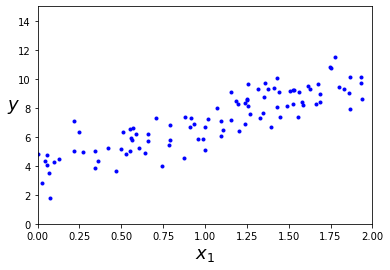

In [3]:
# X,y 그래프 그리기
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [4]:
X_b = np.c_[np.ones((100, 1)), X]  # np.c_ ==> 두 배열을 열로 붙여 2차원 배열 만들기 // 모든 샘플에 x0 = 1을 추가 (X0은 항상 1이므로)
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # np.linalg.inv ==> 역행렬 // 회귀계수 추정식

In [5]:
theta_best # 데이터 생성을 위해 사용한 실제 함수는 y=4+3x로 4와 3에 매우 근사한 값이나 노이즈 때문에 정확히 표현은 안됨

array([[3.79754864],
       [3.20407141]])

In [6]:
X_new = np.array([[0], [2]]) # 예측할 데이터
X_new_b = np.c_[np.ones((2, 1)), X_new]  # 모든 샘플에 x0 = 1을 추가
y_predict = X_new_b.dot(theta_best)
y_predict # theta_best을 이용한 예측값

array([[ 3.79754864],
       [10.20569146]])

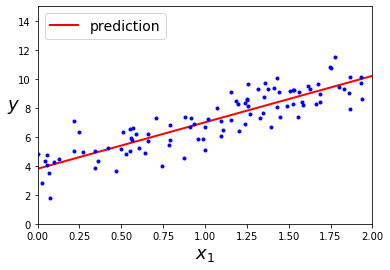

In [7]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="prediction") # 회귀직선 그리기
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

In [8]:
# 사이킷런 이용한 방식
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.79754864]), array([[3.20407141]]))

In [9]:
lin_reg.predict(X_new) # 동일한 값 나옴

array([[ 3.79754864],
       [10.20569146]])

#### 4.1.2 계산 복잡도
- 역행렬을 구하는 시간은 일반적으로 O(n^2.4)에서 O(n^3) 사이(즉, 특성이 2배로 늘어나면 계산 시간은 2^2.4 ~ 2^3배로 증가)
- 훈련 세트 증가에 따른 계산 시간은 선형적으로 증가(즉, 훈련 세트가 2배로 늘어나면 계산 시간도 2배로 증가)
- 정규 방정식도 특성이 매우 많아지면 (예를 들어 100,000개) 속도가 매우 느려짐

## 4.2 경사 하강법
- 경사하강법은 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 매우 일반적인 아이디어
- 기본 아이디어는 비용 함수를 최소화하기 위해 반복해서 파라미터를 조정해나가는 것
- 임의의 값에서 시작한 파라미터 벡터(Theta)에 대해 비용 함수의 현재 그래디언트를 계산하며, 이 그래디언트가 0이 되면 최솟값에 도달한 것
- 경사 하강법에서 중요한 파라미터는 스텝의 크기로, 학습률 하이퍼파라미터로 결정됨
    - 파라미터의 조정치는 MSE와 같은 오차에서 학습률을 곱하여 결정됨
- 경사 하강법이 가진 파라미터가 많을수록 공간의 차원이 커져 검색이 더 어려워짐

#### 4.2.1 배치 경사 하강법
- 매 스텝마다 전체 훈련 세트에 대한 그래디언트 계산(큰 데이터에서 매우 느리지만 특성 수에 민감하지 않음)

In [10]:
eta = 0.1 # step size
n_iterations = 1000 # step size
m = 100 # sample size
theta = np.random.randn(2,1) # 무작위 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) # 매 스텝마다 그래디언트 계산
    theta = theta - eta * gradients # 매 스텝마다 모수 최신화
    
theta # 정규방정식과 같은 theta 값 출력

array([[3.79754864],
       [3.20407141]])

In [11]:
X_new_b.dot(theta) # 계산된 theta

array([[ 3.79754864],
       [10.20569146]])

In [12]:
# theta에 따른 그래프 그리기 함수
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta) # 예측
            style = "b-" if iteration > 0 else "r--" # 처음 style은 'r--'', 이후는 'b-'
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) # 매 스텝마다 그래디언트 계산(m = m)
        theta = theta - eta * gradients # 매 스텝마다 모수 최신화
        if theta_path is not None:
            theta_path.append(theta) # 매 스텝의 theta 저장
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

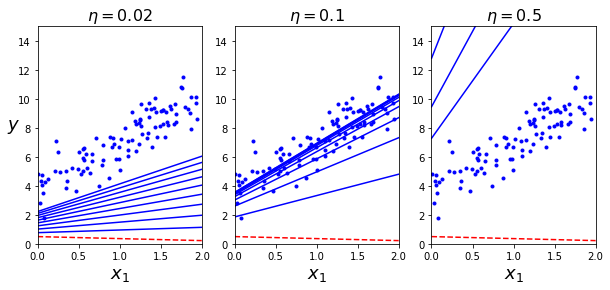

In [13]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

#### 4.2.2 확률적 경사 하강법(SGD)
- 배치 경사 하강법은 모든 샘플에 대해 그래디언트를 계산하여 매우 느림
- 매 스텝마다 임의의 한 샘플에 대한 그래디언트 계산(매우 적은 데이터를 처리하여 빠르지만 불안정-> 지역 최적해를 건너뛰거나 전역 최적해 못 찾음 등)
- 불안정의 해결책으로 매 반복마다 학습률을 결정하는 함수(학습 스케쥴)을 사용해 학습률을 줄여나감

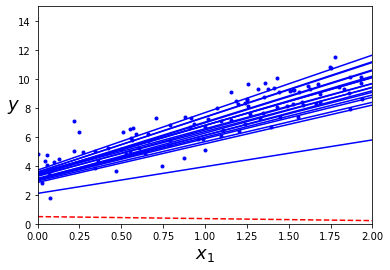

In [14]:
theta_path_sgd = []
m = len(X_b) # sample size
np.random.seed(42)
n_epochs = 50 # iteration size
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # 모수(절편, 기울기) 초기화

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20: # iteration 0일때 초기 20개만 그래프 그림
            y_predict = X_new_b.dot(theta) # 예측
            style = "b-" if i > 0 else "r--" # 처음 style은 'r--'', 이후는 'b-'
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m) # 0~m의 랜덤 정수(스텝 불규칙하게 진행 SGD의 경우 미리 서플 -> 이 경우 성능은 조금 떨어짐)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi) # 매 스텝마다 그래디언트 계산(m = 1이므로 생략됨)
        eta = learning_schedule(epoch * m + i) # 매 스텝마다 학습률 최신화(점점 작아짐)
        theta = theta - eta * gradients # 매 스텝마다 모수 최신화
        theta_path_sgd.append(theta) # 매 스텝마다 theta 저장

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [15]:
theta

array([[3.84079954],
       [3.18814025]])

In [16]:
# 사이킷런 이용한 방식
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=5, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

C:\Users\Yoo\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


(array([3.60122381]), array([3.26292891]))

#### 4.2.3 미니배치 경사 하강법
- 매 스텝마다 작은 샘플 세트(미니배치)에 대한 그래디언트를 계산(미니배치가 어느정도 크면 SGD보다 덜 불규칙하게 움직임)
- GPU를 사용하여 연산하므로 성능의 향상이 있음

In [17]:
theta_path_mgd = []

n_iterations = 50 # step size
minibatch_size = 20 # minibatch size

np.random.seed(42)
theta = np.random.randn(2,1)  # 무작위 초기화

t0, t1 = 200, 1000 # 학습 스케줄 하이퍼파라미터
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m) # 매 epoch마다 순서 섞기
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size): # 0~m까지 i 간격은 minibatch_size 만큼
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi) # 매 스텝마다 그래디언트 계산(m = minibatch)
        eta = learning_schedule(t)  # 매 스텝마다 학습률 최신화(점점 작아지고 확률적 경사 하강법과 다름)
        theta = theta - eta * gradients # 매 스텝마다 모수 최신화
        theta_path_mgd.append(theta) # 매 스텝마다 theta 저장

In [18]:
theta

array([[3.86040938],
       [3.26481827]])

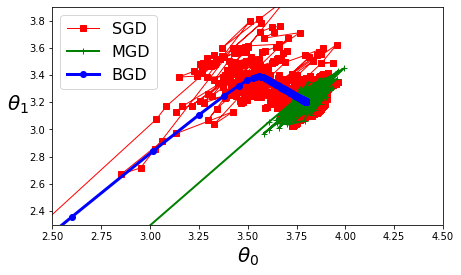

In [19]:
# 배치 경사 하강법, 확률적 경사 하강법, 미니배치 경사 하강법 시각화
theta_path_bgd = np.array(theta_path_bgd) # 배치 경사 하강법의 theta 저장값
theta_path_sgd = np.array(theta_path_sgd) # 확률적 경사 하강법의 theta 저장값
theta_path_mgd = np.array(theta_path_mgd) # 미니배치 경사 하강법의 theta 저장값

plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="SGD")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="MGD")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="BGD")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show() # BGD는 잘 찾아가나 오래걸리고 SGD, MGD는 빠르게 찾아가나 근처를 맴돔

#### 결과 (m이 클 때 //  외부 메모리 학습 지원 // n이 클 때 // 하이퍼파라미터 수 // 스케일 조정 필요 // 사이킷런)
- 정규방정식( 빠름 // No // 느림 // 0 // No // LinearRegression )
- 배치 경사 하강법( 느림 // No // 빠름 // 2 // Yes // n/a )
- 확률적 경사 하강법( 빠름 // Yes // 빠름 // >=2 // Yes // SGDRegressor )
- 미니배치 경사 하강법( 빠름 // Yes // 빠름 // >=2 // Yes // n/a )

## 4.3 다항 회귀
- 비선형 데이터를 학습하는 선형 모델

In [20]:
np.random.seed(42)

m = 100 # sample size
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1) # 2차방정식

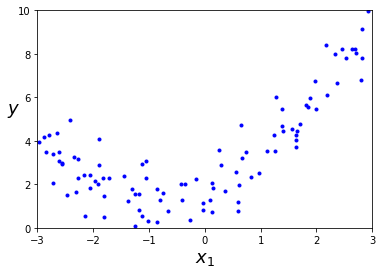

In [21]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [22]:
from sklearn.preprocessing import PolynomialFeatures # PolynomialFeatures ==> 다항식으로 변환하는 함수
# (만약 degree=3,include_bias=False의 경우 (x1,x2) -> (x1, x2, x1^2, x2^2, x1^3, x2^3, x1*x2, x1^2*x2, x1*x2^2))
poly_features = PolynomialFeatures(degree=2, include_bias=False) # degree ==> 차수, include_bias ==> 상수항 여부
X_poly = poly_features.fit_transform(X) # (x) -> (x, x^2)
X[0], X_poly[0] # X_poly는 기존 X에서 특성이 추가됨

(array([-0.75275929]), array([-0.75275929,  0.56664654]))

In [23]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

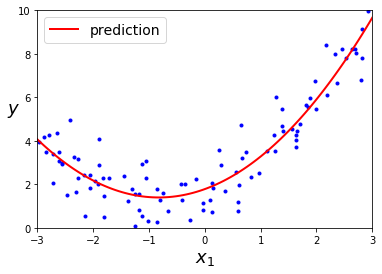

In [24]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1) # np.linspace ==> -3 ~ 3 까지 100개로 나눔
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="prediction")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

## 4.4 학습 곡선
- ( 학습 데이터 MSE / 검증 데이터 MSE) 둘의 차이가 크면 오버피팅 적게 나면 일반화가 잘된 모델

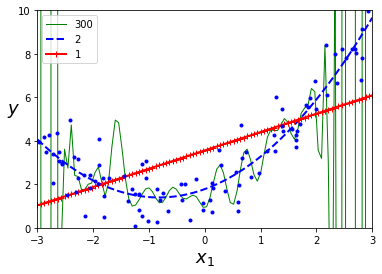

In [25]:
# 여러 차원의 회귀 그래프 그리기
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False) # 다항식으로 만들기
    std_scaler = StandardScaler() # 표준화
    lin_reg = LinearRegression() # 선형 회귀
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ]) # 파이프라인(다항식 -> 표준화 -> 선형회귀)
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show() # 1차 회귀의 경우 과소적합, 300차 다항 회귀의 경우 과대적합

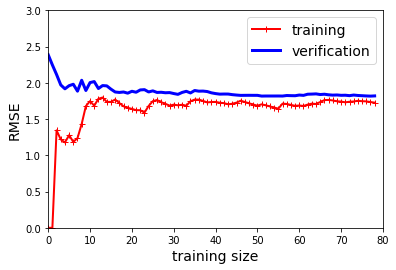

In [26]:
# 학습 곡선 그래프 만드는 함수
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)): # 데이터를 하나씩 추가하면서 성능 확인
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict)) # training MSE 저장
        val_errors.append(mean_squared_error(y_val, y_val_predict)) # verification MSE 저장

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="training")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="verification")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("training size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
plt.show() # 단순 선형 회귀 모델(직선)의 학습 곡선 ==> 과소적합
# 훈련 세트가 적으면 제대로 일반화가 될 수 없어 오차가 크지만, 훈련 샘플이 추가되면서 줄어듬(다만, 선형 모델이라 어느정도 오차가 있음)

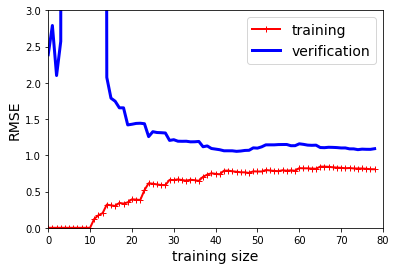

In [27]:
polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.show() # 10차 다항 회귀 곡선의 학습 곡선 ==> 과대적합(더 많은 데이터 필요)
# 곡선의 공간이 크다면 과대적합을 의심할 필요가 있음

##### 두 학습 곡선 해석
- 10차 다항 회귀 곡선의 경우가 훈련 데이터 오차가 훨씬 작음
- 훈련과 검증 두 곡선의 간격이 매우 작다면 과소적합을 의심, 매우 크다면 과대적합을 의심할 수 있음

##### 편향/분산 트레이드오프
- 통계학과 머신러닝에서 나온 중요한 이론 하나는 모델의 일반화 오차는 세 가지 다른 종류의 오차의 합으로 표현 가능
1. 편향: 일반화 오차중 잘못된 가정으로 인한 것(편향이 큰 모델은 과소적합되기 쉬움 // ex - 복잡도 낮은 모델로 고차원 예측)
2. 분산: 훈련 데이터에 있는 작은 변동이 모델에 과도하게 민감하여 나타남(분산이 큰 모델은 과대적합이 쉬움 // ex - 고차원 모델, 자유도 높은 모델 사용)
3. 줄일 수 없는 오차: 데이터 자체에 있는 노이즈 때문에 발생하며 데이터에서 오차를 없애야만 줄일 수 있음(ex - 이상치 제거 등)
4. MSE = bias^2(편향) + var(분산)의 값이라 볼 수 있음
5. 모델이 복잡 -> 불안정: 이상치에 매우 민감하게 반응 ==> 과대적합
6. 모델이 naive -> 안정적: 이상치에 큰 반응이 없음 ==> 과소적합

## 4.5 규제가 있는 선형 모델
- 과대 적합을 예방하기 위해 모델을 규제(선형에서는 주로 가중치를 제한)
- 회귀 모델 평가: MSE + 복잡성에 대한 penalty(모델의 분산을 낮춤) 

#### 4.5.1 릿지 회귀
- 비용 함수에 l2 노름의 제곱을 2로 나눈 규제가 추가된 선형 회귀(알파가 0이면 선형 회귀가 되고 아주 크면 결국 데이터의 평균을 지나는 수평선이 됨)

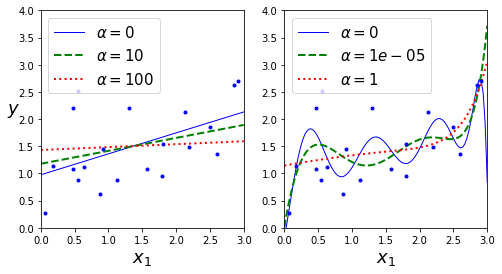

In [28]:
# 알파에 따른 릿지 회귀 그리는 함수
from sklearn.linear_model import Ridge

np.random.seed(42)
m = 20 # sample size
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression() # 0이면 선형 회귀 아니면 릿지 회귀
        if polynomial: # polynomial가 True이면 해당 if문 수행
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ]) # 파이프라인(다항식 -> 표준화 -> 선형회귀)
        model.fit(X, y)
        y_new_regul = model.predict(X_new) # 예측
        lw = 2 if alpha > 0 else 1 # 선형회귀면 lw = 1, 릿지 회귀면 lw = 2
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42) # 알파에 따른 단순 릿지 회귀
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42) #다항식, 표준화 후 알파에 따른 릿지 회귀

plt.show()

In [29]:
# 정규방정식을 사용한 릿지 회귀1
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42) # cholesky ==> 행렬 분해 방법(희소행렬, 특이행렬 아닐 경우 기본값)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [30]:
# 정규방정식을 사용한 릿지 회귀2
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42) # sag ==> SGD의 변종(사이킷런 0.19에서 개량 버전 saga 추가됨)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

In [31]:
# 확률적 경사 하강법을 사용한 릿지 회귀
sgd_reg = SGDRegressor(max_iter=50, penalty="l2", tol=1e-3, random_state=42) # l2의 경우 노름의 제곱을 2로 나눈 규제항 추가 = 릿지 회귀
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

#### 4.5.2 라쏘 회귀
- 비용 함수에 가중치 벡터의 l1 노름을 사용하는 규제로 추가한 선형 회귀(알파가 매우 클 경우 가중치를 0으로 만듬 -> 특성 자동 선택)

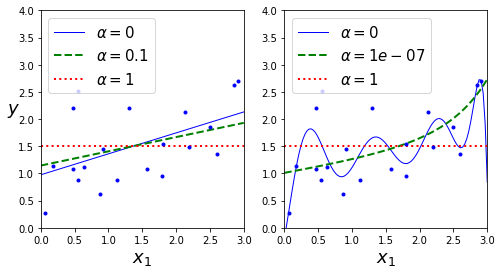

In [32]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42) # 알파에 따른 단순 라쏘 회귀
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), tol=1, random_state=42) #다항식, 표준화 후 알파에 따른 라쏘 회귀
plt.show() # 릿지보다 알파의 규제의 정도가 강함

In [33]:
# 정규방정식을 사용한 라쏘 회귀
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

In [34]:
# 확률적 경사 하강법을 사용한 라쏘 회귀(라쏘 회귀의 비용 함수는 미분이 불가 => 서브그래디언브 벡터 사용)
sgd_reg = SGDRegressor(max_iter=50, penalty="l1", tol=1e-3, random_state=42) # l1 서브그래디언트 벡터를 사용한 미분 = 라쏘 회귀
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47011206])

### 4.5.3 엘라스틱넷
- 릿지와 라쏘의 규제를 단순히 더하여 r로 혼합비율을 조절하는 절충 모델(r=0이면 릿지 회귀, r=1이면 라쏘회귀와 같음)

In [35]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

##### 릿지, 라쏘, 엘라스틱넷 모델 활용 시기
- 대부분의 경우 일반적인 선형 모델보다는 규제가 있는 경우가 좋음
- 릿지: 기본적으로 사용
- 라소: 특성 수가 샘플보다 적고 특성 몇개가 강하게 연관되어 있지 않으며 실제 쓰이는 특성이 별로 없는 경우
- 엘라스틱넷: 특성 수가 샘플보다 많고 특성 몇개가 강하게 연관되어 있으며 실제 쓰이는 특성이 별로 없는 경우

#### 4.5.2 조기 종료
- 검증 에러가 최소에 도달하는 즉시 훈련을 멈추는 것

C:\Users\Yoo\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Yoo\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Yoo\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Yoo\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Yoo\Anaconda3\lib\site-packages\skl

C:\Users\Yoo\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Yoo\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Yoo\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Yoo\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Yoo\Anaconda3\lib\site-packages\skl

C:\Users\Yoo\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Yoo\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Yoo\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Yoo\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Yoo\Anaconda3\lib\site-packages\skl

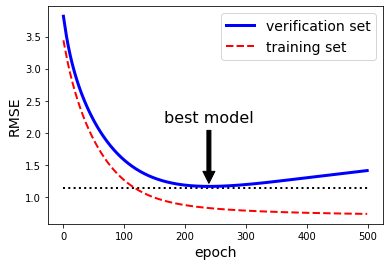

In [36]:
# 조기 종료를 위한 그래프 확인
np.random.seed(42)
m = 100 # sample size
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10) # 훈련, 검증 분할

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ]) # 파이프라인(다항식 -> 표준화)

X_train_poly_scaled = poly_scaler.fit_transform(X_train) # 훈련 세트 fit_transform
X_val_poly_scaled = poly_scaler.transform(X_val) # 검증 세트 transform

sgd_reg = SGDRegressor(max_iter=1, penalty=None, eta0=0.0005, warm_start=True, learning_rate="constant", random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors) # 에러 최솟값 저장
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('best model',
             xy=(best_epoch, best_val_rmse), # xy ==> 화살표가 가르키는 점의 위치
             xytext=(best_epoch, best_val_rmse + 1), # xytext ==> 문자열이 출력될 점의 위치
             ha="center", # ha ==> 화살표 형태?
             arrowprops=dict(facecolor='black', shrink=0.05), # arrowprops ==> 화살표의 특성들 설정
             fontsize=16
            ) # annotate ==> 그림에 글 추가

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2) # 검은 점선 생성
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="verification set") # 검증 세트 그래프
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="training set") # 트레이닝 세트 그래프
plt.legend(loc="upper right", fontsize=14) 
plt.xlabel("epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show() # 검증 세트가 최고점 이후 다시 증가하는 것은 과대적합되기 시작한 것

In [37]:
# 조기 종료 코드
from sklearn.base import clone # clone ==> 복사를 위한 함수?

sgd_reg = SGDRegressor(max_iter=1, warm_start=True, penalty=None,learning_rate="constant", eta0=0.0005, random_state=42)
# warm_start=True ==> fit 메서드가 호출될 때 처음부터 다시 시작이 아니라 이전 모델 파라미터에서 훈련을 이어감
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # 이어서 학습(warm_start=True이고 fit 메서드 호출했으므로)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

C:\Users\Yoo\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Yoo\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Yoo\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Yoo\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Yoo\Anaconda3\lib\site-packages\skl

C:\Users\Yoo\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Yoo\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Yoo\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Yoo\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Yoo\Anaconda3\lib\site-packages\skl

C:\Users\Yoo\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Yoo\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Yoo\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Yoo\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Yoo\Anaconda3\lib\site-packages\skl

C:\Users\Yoo\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Yoo\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Yoo\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Yoo\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Yoo\Anaconda3\lib\site-packages\skl

C:\Users\Yoo\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Yoo\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Yoo\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Yoo\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Yoo\Anaconda3\lib\site-packages\skl

In [38]:
best_epoch, best_model # 최고의 스텝과 파라미터

(239,
 SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
              eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
              learning_rate='constant', loss='squared_loss', max_iter=1,
              n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
              shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
              warm_start=True))

## 4.6 로지스틱 회귀
- 샘플이 특정 클래스에 속할 확률을 추정하는데 널리 사용

#### 4.6.1 확률 추정
- 입력 특성의 가중치 합을 계산 후 편향을 더한 결과값에 로지스틱(0~1 값을 출력하는 시그모이드 함수)을 출력

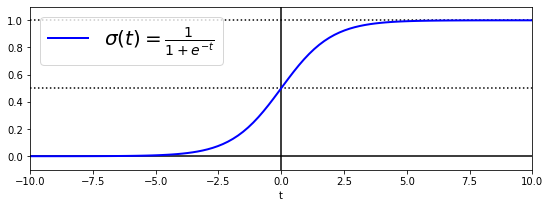

In [39]:
# 로지스틱(시그모이드) 함수 그리기
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t)) # 로지스틱 함수
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-") # x축
plt.plot([-10, 10], [0.5, 0.5], "k:") # y=0.5 점선
plt.plot([-10, 10], [1, 1], "k:") # y=1 점선
plt.plot([0, 0], [-1.1, 1.1], "k-") # y축
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$") # 로지스틱 그래프
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

#### 4.6.2 훈련과 비용 함수

#### 4.6.3 결정 경계

In [40]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [41]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [42]:
X = iris["data"][:, 3:] # 꽃잎 넓이
y = (iris["target"] == 2).astype(np.int) # Iris-Virginica이면 1 아니면 0

In [43]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear', random_state=42) # 사이킷런 0.22부터 solver 기본 값 liblinear -> lbfgs
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

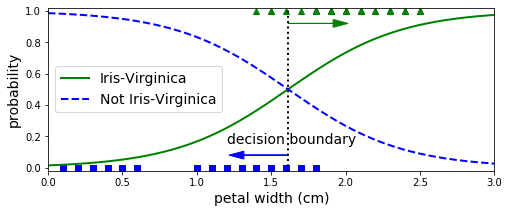

In [44]:
# 결정 경계 그래프 그리기
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new) # X_new에 대한 클래스 확률 저장
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0] # 1로 판정할 확률이 0.5가 넘는 처음 값(오름차순이므로)

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs") # Iris-Virginica 분포구역
plt.plot(X[y==1], y[y==1], "g^") # Iris-Virginica 이외 분포 구역
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2) # 결정 경계 점선
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica") # 1로 예측할 확률 그래프(녹색선)
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica") # 0으로 예측할 확률 그래프(청색선)
plt.text(decision_boundary+0.02, 0.15, "decision boundary", fontsize=14, color="k", ha="center") # decision boundary 텍스트 추가
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b') # 녹색 화살표 추가
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g') # 청색 화살표 추가
plt.xlabel("petal width (cm)", fontsize=14)
plt.ylabel("probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [45]:
decision_boundary # 결정 경계 값

array([1.61561562])

In [46]:
log_reg.predict([[1.7], [1.5]]) # 결정 경계 1.6156을 기준으로 1, 0으로 분류함

array([1, 0])

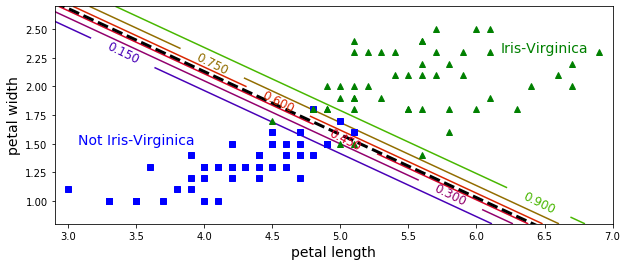

In [47]:
# 선형 결정 경계 그리기(추후 이해 필요함...)
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int) # Iris-Virginica이면 1 아니면 0

log_reg = LogisticRegression(solver='liblinear', C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    ) # np.meshgrid ==> 1차원 배열 2개의 가능한 모든 조합을 만듬(200*500 = 100000)
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs") # y=0인 것들 중 petal length를 x좌표, y=0인 것들 중 petal width를 y로 청색 네모
plt.plot(X[y==1, 0], X[y==1, 1], "g^") # y=1인 것들 중 petal length를 x좌표, y=1인 것들 중 petal width를 y로 녹색 세모

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg) # contour ==> 같은 값을 가진 선을 연결

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12) # 같은 값 가진 선의 라벨 표시
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("petal length", fontsize=14)
plt.ylabel("petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

#### 4.6.4 소프트맥스 회귀 (다항 로지스틱 회귀)
- 여러 개의 이진 분류기를 훈련시켜 연결하지 않고 직접 다중 클래스를 지원하는 회귀(한번에 하나의 클래스만 예측 다중 출력은 불가)
- 샘플 x가 주어지면 각 클래스 k에 대한 점수를 계산하고, 그 점수에 소프트맥스 함수를 적용하여 각 클래스의 확률을 추정 후 가장 높은 점수 선택
- 다만, 소프트맥스는 다중 클래스이지 다중 출력의 역할은 못함
- 크로스 엔트로피는 추정된 클래스의 확률이 타깃 클래스에 얼마나 잘 맞는지에 대한 용도로 사용되며 여기서 비용함수로서 클래스의 확률을 추정

In [48]:
# 소프트맥스 함수 적용
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
# 로지스틱은 둘 이상의 클래스에 OvA 전략이나 multi_class="multinomial"로 바꾸고 이에 맞는 solver="lbfgs"를 쓰면 소프트맥스 회귀 가능
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
softmax_reg.predict([[5, 2]]) # petal length = 5, petal width = 2인 경우 class 2로 예측

array([2])

In [50]:
softmax_reg.predict_proba([[5, 2]]) # 각 class의 속할 확률

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

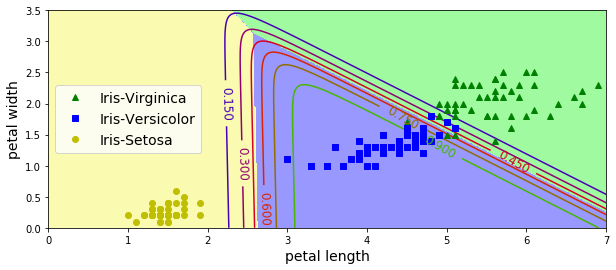

In [51]:
# 소프트맥스 회귀 결정 경계 그리기(추후 이해 필요함...)
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    ) # np.meshgrid ==> 1차원 배열 2개의 가능한 모든 조합을 만듬(200*500 = 100000)
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new) # 예측 class 확률 저장
y_predict = softmax_reg.predict(X_new) # 예측 class 저장

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica") # Virginica 분포 녹색 세모
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor") # Versicolor 분포 청색 네모
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa") # Setosa 분포 노란 원

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0']) # ListedColormap ==> 컬러 색 지정?

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)  # contour ==> 같은 값을 가진 선을 연결
plt.clabel(contour, inline=1, fontsize=12) # 같은 값 가진 선의 라벨 표시
plt.xlabel("petal length", fontsize=14)
plt.ylabel("petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

## 4.7 연습문제

#### 1. 수백만 개의 특성을 가진 훈련 세트에서는 어떤 선형 회귀 알고리즘을 사용할 수 있을까요?
- 수백만 개의 특성을 가진 훈련 세트의 경우 확률적 경사 하강법(SGD), 미니배치 경사 하강법을 사용할 수 있다. 훈련 세트가 메모리 크기에 맞는다면 배치 경사 하강법도 가능은 하다. 하지만 정규방정식은 계산 복잡도가 특성 개수에 따라 매우 빠르게 증가하므로 사용하기 힘들다.

#### 2. 훈련 세트에 있는 특성들이 각기 아주 다른 스케일을 가지고 있습니다. 이런 데이터에 잘 작동하지 않는 알고리즘은 무엇일까요? 그 이유는 무엇일까요? 이 문제를 어떻게 해결해야 할까요?
- 훈련 세트에 특성들의 스케일이 매우 다르면 비용 함수는 길쭉한 타원 모양의 그릇 형태가 된다. 그래서 경사 하강법(GD) 알고리즘이 수렴하는데 매우 오랜 시간이 걸릴 것이다. 이를 해결하기 위해서는 모델을 훈련하기 전에 데이터의 스케일을 조정하면 된다. 정규방정식의 경우 스케일의 조정 없이도 잘 작동한다. 또한 규제가 있는 모델은 특성의 스케일이 다르면 지역 최적점에 수렴할 가능성도 있다. 실제로 규제는 가중치가 커지지 못하게 제약을 가하므로 특성값이 작으면 큰 값을 가진 특성에 비해 무시되는 경향이 있다.

#### 3. 경사 하강법으로 로지스틱 회귀 모델을 훈련시킬 때 지역 최솟값에 갇힐 가능성이 있을까요?
- 로지스틱 회귀 모델의 비용 함수는 볼록 함수이므로 경사 하강법이 훈련될 때 지역 최솟값에 갇힐 가능성은 없다.

#### 4. 충분히 오랫동안 실행하면 모든 경사 하강법 알고리즘이 같은 모델을 만들까요?
- 최적화할 함수가 (선형, 로지스틱 처럼) 볼록 함수이고 학습률이 너무 크지 않다고 가정한다면 모든 경사 하강법 알고리즘이 전역 최적값에 도달하여 결국 비슷한 모델을 만들 것이다. 하지만 학습률을 점진적으로 감소시키지 않으면 확률적 경사 하강법과 미니배치 경사 하강법은 전역 최적점에 수렴하지 못하고 주변을 맴돌게 될 것이다. 이 말은 매우 오랫동안 훈련해도 경사 하강법 알고리즘들은 조금씩 다른 모델을 만들게 된다는 뜻이다.

#### 5. 배치 경사 하강법을 사용하고 에포크마다 검증 오차를 그래프로 나타내봤습니다. 검증 오차가 일정하게 상승되고 있다면 어떤 일이 일어나고 있는 걸까요? 이 문제를 어떻게 해결할 수 있나요?
- 에포크마다 검증 오차가 점진적으로 상승한다면 한 가지의 가능성은 학습률이 너무 높아 알고리즘이 발산하는 것일 수 있다. 훈련 에러도 올라간다면 이 문제가 확실하고 학습률을 낮춰야 한다. 그러나 훈련 에러가 올라가지 않는다면 모델이 훈련 세트에 과대적합 되어 있는 것이므로 훈련을 멈춰야 한다.

#### 6. 검증 오차가 상승하면 미니배치 경사 하강법을 즉시 중단하는 것이 좋은 방법일까요?
- 무작위성 때문에 확률적 경사 하강법이나 미니배치 경사 하강법 모두 매 훈련 반복마다 학습의 진전이 보장되지 못한다. 검증 에러가 상승될 때 훈련을 즉시 멈춘다면 최적점에 도달하기 전에 너무 일찍 멈추게 될지 모른다. 더 나은 방법은 정기적으로 모델을 저장하고 오랫동안 진전이 없을 때(즉, 최상의 점수를 넘어서지 못하면), 저장된 것 중 가장 좋은 모델로 복원하는 것이다.

#### 7. 어떤 경사 하강법 알고리즘이 가장 빠른 최적 솔루션의 주변에 도달할까요? 실제로 수렴하는 것은 어떤 것인가요? 다른 방법들도 수렴하게 만들 수 있나요?
- 확률적 경사 하강법이 한 번에 하나의 훈련 샘플만을 사용하기 때문에 훈련 반복이 가장 빨라 가장 먼저 도달한다. 그 다음은 작은 미니배치 훈련 샘플 크기를 가진 미니배치 경사 하강법이다. 그러나 훈련 시간이 충분하다면 배치 경사 하강법만 실제로 수렴할 것이다. 앞서 언급한 대로 학습률은 점진적으로 감소시키지 않으면 확률적 경사 하강법과 미니배치 경사 하강법은 최적점 주변을 맴돌 것이다.

#### 8. 다항 회귀를 사용했을 때 학습 곡선을 보니 훈련 오차와 검증 오차 사이에 간격이 큽니다. 무슨 일이 생긴 걸까요? 이 문제를 해결하는 세 가지 방법은 무엇인가요?
- 검증 오차가 훈련 오차보다 훨씬 더 높으면 모델이 훈련 세트에 과대적합되었기 때문일 가능성이 높다. 이를 해결하기 위해서는 첫 번째로 다항 차수를 낮추는 것이다. 자유도를 줄이면 과대적합이 훨씬 줄어들 것이다. 두 번째 방법은 모델을 규제하는 것이다. 예를 들어 비용함수에 l2 패널티(릿지)나 l1 패널티(라쏘)를 추가한다. 이 방법도 모델의 자유도를 감소시킨다. 세 번째 방법은 더 큰 훈련 세트를 만드는 것이다.

#### 9. 릿지 회귀를 사용했을 때 훈련 오차와 검증 오차가 거의 비슷하고 둘 다 높았습니다. 이 모델에는 높은 편향이 문제인가요? 아니면 높은 분산이 문제인가요? 규제 하이퍼파라미터 알파를 증가시켜야 할까요? 아니면 줄여야 할까요?
- 훈련 오차와 검증 오차가 거의 비슷하고 매우 높다면 이 모델은 훈련 세트에 과소적합되었을 가능성이 높다. 즉, 높은 편향을 가진 모델이다. 따라서 규제 하이퍼파라미터 알파를 감소시켜야 한다.

#### 10. 다음과 같이 사용해야 하는 이유는?
1. 평범한 선형 회귀(즉, 아무런 규제가 없는 모델) 대신 릿지 회귀
2. 릿지 회귀 대신 라쏘 회귀
3. 라쏘 회귀 대신 엘라스틱넷

- 규제가 있는 모델이 일반적으로 규제가 없는 모델보다 성능이 좋다. 그래서 평범한 선형 회귀보다 릿지 회귀가 선호된다.
- 라쏘 회귀는 l1 패널티를 사용하여 가중치를 완전히 0으로 만드는 경향이 있다. 이는 가장 중요한 가중치를 제외하고는 모두 0이 되는 희소한 모델을 만든다. 또한 자동으로 특성 선택의 효과를 가지므로 단지 몇 개의 특성만 실제 유용할 것이라고 의심될 때 사용하면 좋다. 만약 확신이 없다면 릿지 회귀를 사용한다.
- 라쏘가 어떤 경우(몇 개의 특성이 강하게 연관되어 있거나, 훈련 샘플보다 특성이 더 많을 때)에는 불규칙하게 행동하므로 엘라스틱넷이 라쏘보다 일반적으로 선호된다. 그러나 추가적인 하이퍼파라미터가 생긴다. 불규칙한 행동이 없는 라쏘를 원하면 엘라스틱넷의 l1_ratio를 1에 가깝에 설정하면 된다.

#### 11. 사진을 낮과 밤, 실내와 실외로 분류하려 합니다. 두 개의 로지스틱 회귀 분류기를 만들어야 할까요? 아니면 하나의 소프트맥스 회귀 분류기를 만들어야 할까요?
- 실내와 실외, 낮과 밤에 따라 사진을 구분하고 싶다면 이 둘은 베타적인 클래스가 아니기 때문에(즉, 4가지 조합이 모두 가능) 두 개의 로지스틱 회귀 분류기를 훈련시켜야 한다.

#### 12. 조기 종료를 사용한 배치 경사 하강법으로 소프트맥스 회귀를 구현해보세요(사이킷 런은 사용하지 마세요)